# Task 3
## Number Recognition

### Import necessary liberis

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


### Fethch data 

In [5]:
data = fetch_openml('mnist_784', parser='liac-arff')


In [7]:
x, y = data['data'], data['target']

### Shape check

In [8]:
x.shape

(70000, 784)

In [9]:
y.shape

(70000,)

### Length check

In [10]:
len(x)

70000

### Reshape the data to plot

In [11]:
some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  


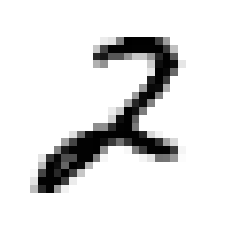

In [12]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()

In [13]:
y[36001]

'2'

In [14]:
x_train, x_test = x[:60000], x[60000:]

In [15]:
y_train, y_test = y[:60000], y[60000:]

### Get the number of samples

In [16]:

n_samples = len(x_train)  

# Generate a random permutation of indices
shuffle_index = np.random.permutation(n_samples)

x_train_shuffled = x_train.iloc[shuffle_index]  # For DataFrames
y_train_shuffled = y_train.iloc[shuffle_index]  # For Series



### creating 2 detector


In [17]:
y_train = y_train.astype(np.int8)
y_test  = y_test.astype(np.int8)

y_train_2 = (y_train ==2)
y_test_2 = (y_test ==2)

In [18]:
y_test_2

60000    False
60001     True
60002    False
60003    False
60004    False
         ...  
69995     True
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool

### LogisticRegression

In [21]:
num_recog = LogisticRegression(tol=0.1)

In [22]:
num_recog.fit(x_train, y_train_2)

C:\Users\Windows10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [23]:
num_recog.predict([some_digit])

C:\Users\Windows10\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

### Cross validation

In [24]:

a = cross_val_score(num_recog, x_train, y_train, cv=3, scoring ="accuracy" )


C:\Users\Windows10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Windows10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [25]:
print(a.mean())

0.9151666666666666
